# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
 df =  pd.read_csv('../datasets/Ecommerce_Sales_Data_2024_2025.csv')

In [4]:
df.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


# Quick Check (Structure & Type)

In [5]:
df.shape

(5000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   object 
 2   Customer Name  5000 non-null   object 
 3   Region         5000 non-null   object 
 4   City           5000 non-null   object 
 5   Category       5000 non-null   object 
 6   Sub-Category   5000 non-null   object 
 7   Product Name   5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


In [7]:
df.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
Region           0
City             0
Category         0
Sub-Category     0
Product Name     0
Quantity         0
Unit Price       0
Discount         0
Sales            0
Profit           0
Payment Mode     0
dtype: int64

In [8]:
df.columns.tolist()

['Order ID',
 'Order Date',
 'Customer Name',
 'Region',
 'City',
 'Category',
 'Sub-Category',
 'Product Name',
 'Quantity',
 'Unit Price',
 'Discount',
 'Sales',
 'Profit',
 'Payment Mode']

# Handle Missing Values And Duplicates 

In [23]:
df = df.dropna()
df = df.drop_duplicates()
df.shape

(5000, 15)

# Basic Data Cleaning

In [24]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
df.head()

,Order_ID,Order_Date,Customer_Name,Region,City,Category,Sub-Category,Product_Name,Quantity,Unit_Price,Discount,Sales,Profit,Payment_Mode,Profit_Margin
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card,15.262911
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card,18.675620
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card,9.561640
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI,22.893273
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card,20.096329


# Feature Engineering ,Convert Order Date , Month & Year , Profit Margin

In [30]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month_name()

df = df[df['Sales'] != 0]
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

df[['Sales', 'Profit', 'Profit_Margin','Order_Date']].head()

,Sales,Profit,Profit_Margin,Order_Date
0,68958.6,10525.09,15.262911,2024-10-19
1,33732.0,6299.66,18.675620,2025-08-30
2,207603.2,19850.27,9.561640,2023-11-04
3,158610.0,36311.02,22.893273,2025-05-23
4,45033.3,9050.04,20.096329,2025-01-19


# Basic KPI

In [26]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_profit_margin = df['Profit_Margin'].mean()

total_sales, total_profit, avg_profit_margin

(533666024.35, 79708734.91, 14.923882987851746)

# EDA: Sales By Category

In [27]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales

Category
Home Decor     57233222.35
Furniture      56647187.90
Clothing       55053908.30
Books          54932643.00
Kitchen        54227902.30
Electronics    52587883.95
Toys           52227366.45
Sports         52069397.25
Beauty         50803409.70
Groceries      47883103.15
Name: Sales, dtype: float64

# Sales By Category( Visualisation)

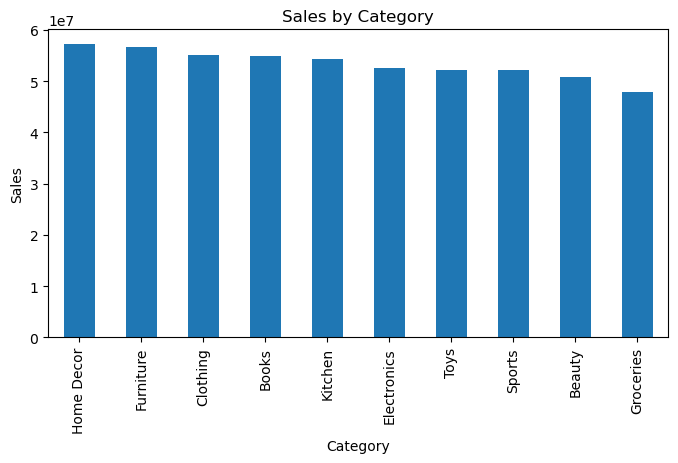

In [13]:
category_sales.plot(kind='bar', figsize=(8,4), title='Sales by Category')
plt.ylabel('Sales')
plt.show()

# Monthly Sales Trend

In [24]:
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales

Order_Date
2023-10    21307522.20
2023-11    22040269.20
2023-12    20624240.25
2024-01    21477241.40
2024-02    19853396.50
2024-03    21571015.35
2024-04    22214781.10
2024-05    24744786.55
2024-06    21368962.50
2024-07    24019283.90
2024-08    23299894.50
2024-09    22480182.05
2024-10    23607626.65
2024-11    22036247.55
2024-12    24806786.40
2025-01    21520801.80
2025-02    19902446.10
2025-03    22602988.75
2025-04    21653817.90
2025-05    26010928.65
2025-06    21155496.20
2025-07    22526567.55
2025-08    23317916.20
2025-09    18131496.70
2025-10     1391328.40
Freq: M, Name: Sales, dtype: float64

# Monthly Sales Trend (Visualisaton)

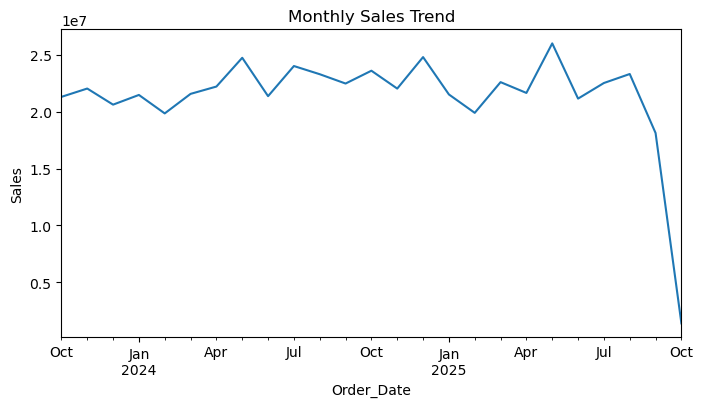

In [25]:
monthly_sales.plot(kind='line', figsize=(8,4), title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()

# EDA Profit Distribution

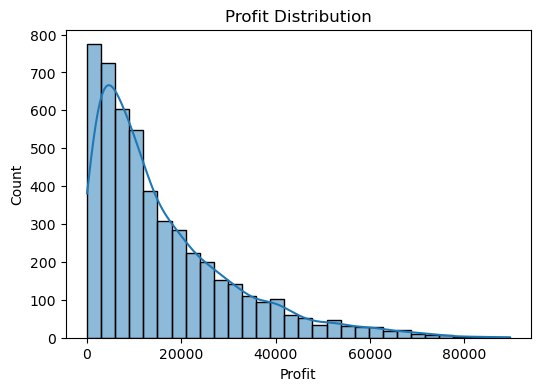

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.show()

# Top Product for Customers

In [28]:
top_products = (
    df.groupby('Product_Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products

Product_Name
Headphones Accusantium     857184.20
Spices Quibusdam           687651.25
Accessories Repellendus    687083.30
Bed Tenetur                670994.80
Laptop Similique           666640.60
Lamp Enim                  665920.20
Shampoo Commodi            659546.60
Lamp Veritatis             652909.50
Men's Wear Voluptatibus    649048.00
Textbook Omnis             633246.25
Name: Sales, dtype: float64

# Top Product( Visualisation)

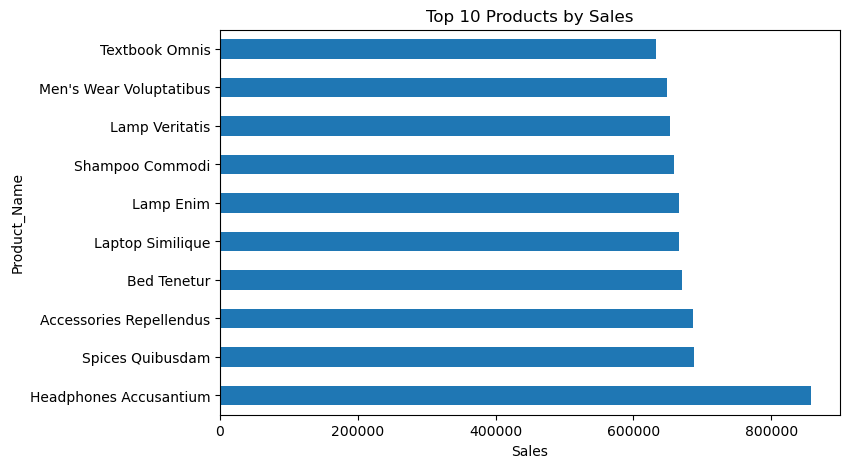

In [29]:
top_products.plot(kind='barh', figsize=(8,5), title='Top 10 Products by Sales')
plt.xlabel('Sales')
plt.show()


## Key Insights

- Sales are driven by a limited number of product categories.
- Monthly sales show clear trends over time.
- A small group of products contributes the majority of revenue.
- Profit margins vary significantly across transactions.

This analysis provides a quick overview of sales performance
and customer product preferences.


In [33]:
powerbi_df = df[[
    'Order_Date',
    'Category',
    'Sub-Category',
    'Product_Name',
    'Customer_Name',
    'Region',
    'Sales',
    'Profit',
    'Profit_Margin',
    'Quantity'
]]

powerbi_df.to_csv("ecommerce_sales_powerbi.csv", index=False)